In [2]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def data_summary(df):
	df = np.array(df).flatten()

	df_pop = len(df)
	df_mode = stats.mode(df, keepdims=True)[0][0]
	df_median = np.median(df)
	df_mean = np.mean(df)

	df_sdev = np.std(df, ddof=1)
	df_variance = np.var(df, ddof=1)

	df_skewness = stats.skew(df)
	df_kurtosis = stats.kurtosis(df)

	df_sem = stats.sem(df)
	df_se_skew = np.sqrt(6 / df_pop)
	df_se_kurt = np.sqrt(24 / df_pop)

	df_q1, df_q2, df_q3 = np.quantile(df, [0.25, 0.50, 0.75])
	df_p25, df_p50, df_p75, df_p90, df_p95 = np.percentile(df, [25, 50, 75, 90, 95])
	df_min = np.min(df)
	df_max = np.max(df)
	df_iqr = df_q3 - df_q1

	table = {
		"Valid (N)": df_pop,
		"Mode": df_mode,
		"Median": df_median,
		"Mean": df_mean,
		"Std. Deviation": df_sdev,
		"Variance": df_variance,
		"Skewness": df_skewness,
		"Std. Error of Measurement": df_sem,
		"Std. Error of Skewness": df_se_skew,
		"Kurtosis": df_kurtosis,
		"Std. Error of Kurtosis": df_se_kurt,
		"Minimum": df_min,
		"Maximum": df_max,
		"Q1": df_q1,
		"Q2": df_q2,
		"Q3": df_q3,
		"IQR": df_iqr,
		"25th Percentile": df_p25,
		"50th Percentile": df_p50,
		"75th Percentile": df_p75,
		"90th Percentile": df_p90,
		"95th Percentile": df_p95,
	}

	return table

def create_freq_table(df):
	freq_dict = pd.value_counts(df)
	freq_table = pd.DataFrame(list(freq_dict.items()), columns=["Value", "Frequency"])
	freq_table = freq_table.sort_values("Value").reset_index(drop=True)

	x = np.array(freq_table["Value"])
	y = np.array(freq_table["Frequency"])
	plt.bar(x, y)
	plt.xlabel("Values")
	plt.ylabel("Frequency")

	freq_table["Relative Frequency"] = freq_table["Frequency"] / freq_table['Frequency'].sum()
	freq_table["Cumulative Frequency"] = freq_table["Frequency"].cumsum()
	return freq_table


male_data = ("12 7 7 10 8 10 11 9 9 13 4 9 12 11 9 9 7 12 10 13 11 10 6 12 11 9 10 12 8 9 13 10 9 7 10 7 10 8 11 10 11 "
													"7 15 8 9 9 11 13 10 13")
female_data = ("11 10 11 10 11 12 12 10 9 9 9 10 8 7 12 9 7 8 9 8 7 7 9 9 12 10 9 13 9 9 10 9 6 12 8 11 8 8 11 12 9 10 "
															"11 14 12 7 11 10 9 11")

male_df = male_data.split()
male_df = np.array([int(i) for i in male_df])

female_df = female_data.split()
female_df = np.array([int(i) for i in female_df])

df = np.concatenate((female_df, male_df))  # Combined arrays


# I.

### 1.) Provide descriptive statistical summaries of the entire data.

                                Score
Valid (N)                  100.000000
Mode                         9.000000
Median                      10.000000
Mean                         9.760000
Std. Deviation               1.964945
Variance                     3.861010
Skewness                    -0.007232
Std. Error of Measurement    0.196495
Std. Error of Skewness       0.244949
Kurtosis                    -0.044382
Std. Error of Kurtosis       0.489898
Minimum                      4.000000
Maximum                     15.000000
Q1                           9.000000
Q2                          10.000000
Q3                          11.000000
IQR                          2.000000
25th Percentile              9.000000
50th Percentile             10.000000
75th Percentile             11.000000
90th Percentile             12.000000
95th Percentile             13.000000

     Value  Frequency  Relative Frequency  Cumulative Frequency
0       4          1                0.01                     

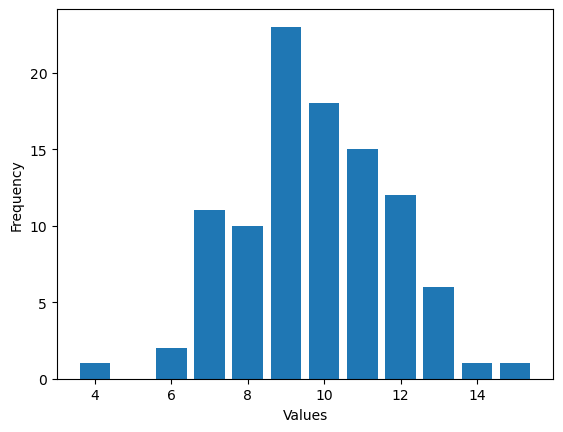

In [16]:
df_summary = pd.DataFrame(data_summary(df), index=["Score"]).T
print(df_summary)

# Frequency Table and Histogram
combined_freq_table = create_freq_table(df)
print("\n", combined_freq_table)

## 2.) Provide descriptive statistical summaries of the data for each gender.

### Male Dataset

                               Score
Valid (N)                  50.000000
Mode                        9.000000
Median                     10.000000
Mean                        9.820000
Std. Deviation              2.154161
Variance                    4.640408
Skewness                   -0.111207
Std. Error of Measurement   0.304644
Std. Error of Skewness      0.346410
Kurtosis                    0.042378
Std. Error of Kurtosis      0.692820
Minimum                     4.000000
Maximum                    15.000000
Q1                          9.000000
Q2                         10.000000
Q3                         11.000000
IQR                         2.000000
25th Percentile             9.000000
50th Percentile            10.000000
75th Percentile            11.000000
90th Percentile            13.000000
95th Percentile            13.000000

    Value  Frequency  Relative Frequency  Cumulative Frequency
0      4          1                0.02                     1
1      6          1    

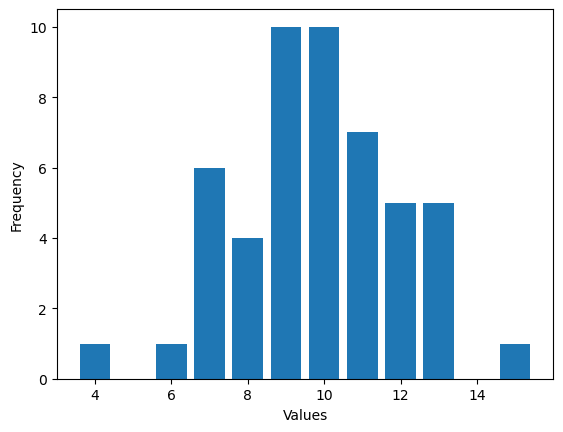

In [10]:
male_summary = pd.DataFrame(data_summary(male_df), index=["Score"]).T
print(male_summary)

male_freq_table = create_freq_table(male_df)
print("\n", male_freq_table)

### Female Dataset

                               Score
Valid (N)                  50.000000
Mode                        9.000000
Median                      9.500000
Mean                        9.700000
Std. Deviation              1.775686
Variance                    3.153061
Skewness                    0.130345
Std. Error of Measurement   0.251120
Std. Error of Skewness      0.346410
Kurtosis                   -0.516480
Std. Error of Kurtosis      0.692820
Minimum                     6.000000
Maximum                    14.000000
Q1                          9.000000
Q2                          9.500000
Q3                         11.000000
IQR                         2.000000
25th Percentile             9.000000
50th Percentile             9.500000
75th Percentile            11.000000
90th Percentile            12.000000
95th Percentile            12.000000

    Value  Frequency  Relative Frequency  Cumulative Frequency
0      6          1                0.02                     1
1      7          5    

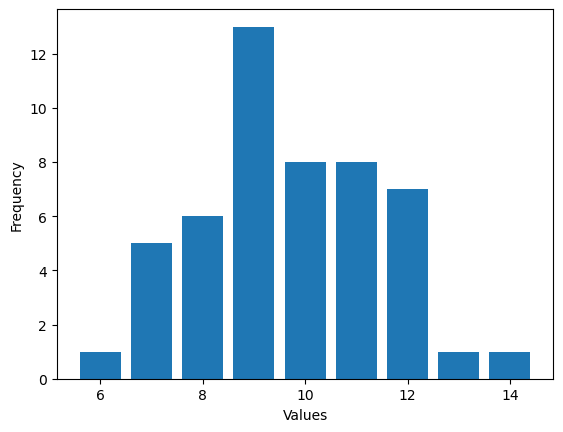

In [11]:
female_summary = pd.DataFrame(data_summary(female_df), index=["Score"]).T
print(female_summary)

female_freq_table = create_freq_table(female_df)
print("\n", female_freq_table)

## 3.) Make a report based on the statistical summaries, including the results for both the combined data (not split by gender) and the gender-specific categories.

This report presents the descriptive statistical summaries of the dataset for both male and female groups, as well as their combined data. 

It also examines whether there is a significant difference between the two population means using hypothesis testing.

The hypotheses tested are:
#### H0 = μ1 = μ2
                
#### H1 = μ1 != μ2

In [20]:
t_stat, p_value = stats.ttest_ind(male_df, female_df, equal_var=True)
print(f"Given t-statistic: {round(t_stat, 3)}, which is close to 0; and p-value: {round(p_value, 3)} which is greater "
						f"than 0.05, we fail to reject the null hypothesis and conclude that there is "
						f"no significant difference between the male and female datasets.")

Given t-statistic: 0.304, which is close to 0; and p-value: 0.762 which is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant difference between the male and female datasets.


## Statistical Summary

#### Combined data (not split by gender)

In [19]:
print(df_summary)

                                Score
Valid (N)                  100.000000
Mode                         9.000000
Median                      10.000000
Mean                         9.760000
Std. Deviation               1.964945
Variance                     3.861010
Skewness                    -0.007232
Std. Error of Measurement    0.196495
Std. Error of Skewness       0.244949
Kurtosis                    -0.044382
Std. Error of Kurtosis       0.489898
Minimum                      4.000000
Maximum                     15.000000
Q1                           9.000000
Q2                          10.000000
Q3                          11.000000
IQR                          2.000000
25th Percentile              9.000000
50th Percentile             10.000000
75th Percentile             11.000000
90th Percentile             12.000000
95th Percentile             13.000000


#### Gender specific

In [17]:
merged_summary = pd.concat([male_summary, female_summary], axis=1)
merged_summary.columns = ['Male', 'Female']
print("\n", merged_summary)


                                 Male     Female
Valid (N)                  50.000000  50.000000
Mode                        9.000000   9.000000
Median                     10.000000   9.500000
Mean                        9.820000   9.700000
Std. Deviation              2.154161   1.775686
Variance                    4.640408   3.153061
Skewness                   -0.111207   0.130345
Std. Error of Measurement   0.304644   0.251120
Std. Error of Skewness      0.346410   0.346410
Kurtosis                    0.042378  -0.516480
Std. Error of Kurtosis      0.692820   0.692820
Minimum                     4.000000   6.000000
Maximum                    15.000000  14.000000
Q1                          9.000000   9.000000
Q2                         10.000000   9.500000
Q3                         11.000000  11.000000
IQR                         2.000000   2.000000
25th Percentile             9.000000   9.000000
50th Percentile            10.000000   9.500000
75th Percentile            11.000000  

Given these statistical summaries:

#### Combined Data
For the total sample of 100 respondents, the mean score was 9.76 (SD = 1.96), with a median of 10 and a mode of 9. The distribution was approximately normal, as indicated by near-zero skewness (–0.01) and kurtosis (–0.04). Scores ranged from 4 to 15, with an interquartile range (IQR) of 2, suggesting that most scores clustered closely around the mean. Overall, the data indicate a consistent and moderately concentrated distribution of scores across participants.

#### Gender Specific
Based on the descriptive statistics, male respondents (M = 9.82, SD = 2.15) and female respondents (M = 9.70, SD = 1.78) had very similar mean scores. The variability of scores, as indicated by the standard deviations, was also comparable between groups. Both distributions were approximately symmetric (Skewness ≈ 0) and showed minimal kurtosis, suggesting a near-normal distribution of scores.

# II.

## 1.) Find the (a) first, (b) second, (c) third, and (d) fourth moments of the set 2, 3, 7, 8, 10.




In [21]:
data_2 = pd.DataFrame([2, 3, 7, 8, 10])

m1 = round(float(np.mean(data_2)), 3)
m2 = round(float(np.mean(data_2**2)), 3)
m3 = round(float(np.mean(data_2**3)), 3)
m4 = round(float(np.mean(data_2**4)), 3)

print("Moment 1:", m1)
print("Moment 2:", m2)
print("Moment 3:", m3)
print("Moment 4:", m4)

Moment 1: 6.0
Moment 2: 45.2
Moment 3: 378.0
Moment 4: 3318.8


## 2.) Find the (a) first, (b) second, (c) third, and (d) fourth moments about the mean of the set 2, 3, 7, 8, 10.

In [22]:
normal_m1 = stats.moment(data_2)
normal_m1 = round(float(normal_m1), 3)
normal_m2 = stats.moment(data_2, 2)
normal_m2 = round(float(normal_m2), 3)
normal_m3 = stats.moment(data_2, 3)
normal_m3 = round(float(normal_m3), 3)
normal_m4 = stats.moment(data_2, 4)
normal_m4 = round(float(normal_m4), 3)

print("Moment 1 about the mean:", normal_m1)
print("Moment 2 about the mean:", normal_m2)
print("Moment 3 about the mean:", normal_m3)
print("Moment 4 about the mean:", normal_m4)

Moment 1 about the mean: 0.0
Moment 2 about the mean: 9.2
Moment 3 about the mean: -3.6
Moment 4 about the mean: 122.0


## 3.) Verify 
$$
m_4 = m'_4 - 4m'_1 m'_3 + 6(m'_1)^2 m'_2 - 3(m'_1)^4
$$ 
## for the set 2, 3 , 7, 8, 10.

In [24]:
verify_normal_m4 = round((m4 - (4*m1*m3) + (6*(m1**2)*m2) - (3*(m1**4))), 3)
print(normal_m4, "=", verify_normal_m4)

122.0 = 122.0


# III.

## Prove that 
$$
m'_4 = m_4 + 4hm_3 + 6h^2 m_2 + h^4, \quad \text{where } h = m'_1
$$

### Proof: Relationship between the 4th raw moment \(m'_4\) and the 4th central moment \(m_4\)

Let

$$
m'_r = \frac{1}{n}\sum_{i=1}^n x_i^r \qquad\text{(raw moment)}, \qquad
m_r = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^r \qquad\text{(central moment)}.
$$

Set

$$
h = \bar{x} = m'_1.
$$

Using

$$
x_i = (x_i - h) + h
$$

and expanding with the binomial theorem:

$$
x_i^4 = \big((x_i - h) + h\big)^4
      = (x_i - h)^4 + 4h(x_i - h)^3 + 6h^2(x_i - h)^2 + 4h^3(x_i - h) + h^4.
$$

Average over \(i\) (divide by \(n\) and sum):

$$
\frac{1}{n}\sum_{i=1}^n x_i^4
= \frac{1}{n}\sum_{i=1}^n (x_i - h)^4
+ 4h\frac{1}{n}\sum_{i=1}^n (x_i - h)^3
+ 6h^2\frac{1}{n}\sum_{i=1}^n (x_i - h)^2
+ 4h^3\frac{1}{n}\sum_{i=1}^n (x_i - h)
+ h^4.
$$

Recognize the central moments on the right-hand side:

$$
m'_4 = m_4 + 4h\,m_3 + 6h^2\,m_2 + 4h^3\,m_1 + h^4.
$$

But by definition the first central moment is

$$
m_1 = \frac{1}{n}\sum_{i=1}^n (x_i - h) = 0,
$$

so the $$4h^3 m_1$$ term equals zero:

$$
4h^3 m_1 = 4h^3\cdot 0 = 0.
$$

Therefore

$$
\boxed{\,m'_4 = m_4 + 4h\,m_3 + 6h^2\,m_2 + h^4,\quad\text{where } h = m'_1. \,}
$$
